In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
# 4 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_55/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.describe()

,reti-1,reti0,reti+1,mcwat-1,mcwat0,mcwat+1,mcwas-1,mcwas0,mcwas+1,t_reti,tpr_reti,t_mcwat,tpr_mcwat,t_mcwas,tpr_mcwas
count,667378.000000,6.673780e+05,667378.000000,667378.000000,6.673780e+05,667378.000000,667378.000000,6.673780e+05,667378.000000,667378.000000,667378.000000,667378.000000,667378.000000,667378.000000,667378.000000
mean,0.095369,6.292963e-01,0.139751,0.095547,6.285545e-01,0.139954,0.095547,6.285545e-01,0.139954,0.170328,0.547150,0.040612,0.291288,0.114737,0.888279
std,0.108292,3.184689e-01,0.188423,0.108353,3.183310e-01,0.188437,0.108353,3.183310e-01,0.188437,0.035719,0.299666,0.006523,0.050345,0.015841,0.121565
min,0.000000,1.988258e-07,0.000000,0.000000,2.255145e-07,0.000000,0.000000,2.255145e-07,0.000000,0.106895,0.001674,0.023385,0.166779,0.080572,0.625968
25%,0.021797,3.508678e-01,0.024484,0.021887,3.497859e-01,0.024585,0.021887,3.497859e-01,0.024585,0.141522,0.315213,0.035029,0.248189,0.103475,0.801204
50%,0.056098,7.721961e-01,0.065385,0.056298,7.709889e-01,0.065651,0.056298,7.709889e-01,0.065651,0.149786,0.749442,0.039526,0.278881,0.114902,0.890562
75%,0.128185,8.942982e-01,0.169839,0.128532,8.936676e-01,0.170226,0.128532,8.936676e-01,0.170226,0.187373,0.761636,0.046053,0.334283,0.125251,0.968384
max,0.981848,9.981713e-01,0.983145,0.981273,9.981820e-01,0.982961,0.981273,9.981820e-01,0.982961,0.616250,0.801606,0.089144,0.635602,0.369626,2.010462


# TMM to reticolo

In [5]:
A, B = 'mcwat', 'reti'

In [6]:
df['gap-1'] = df[f'{A}-1'] - df[f'{B}-1']
df['gap0'] = df[f'{A}0'] - df[f'{B}0']
df['gap+1'] = df[f'{A}+1'] - df[f'{B}+1']
df['t_gap'] = df[f't_{A}'] - df[f't_{B}']
df['tpr_gap'] = df[f'tpr_{A}'] - df[f'tpr_{B}']

# Benchmark

## difference in transmittance

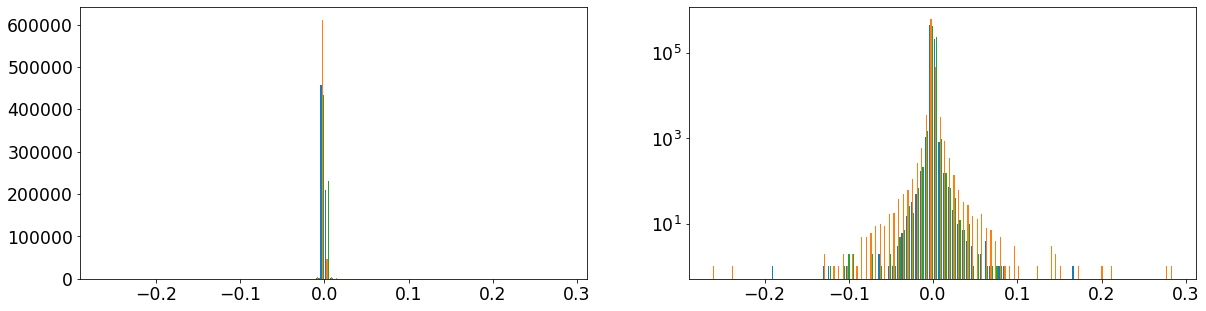

In [7]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

In [8]:
df[['gap-1','gap0','gap+1']].describe().T

,count,mean,std,min,25%,50%,75%,max
gap-1,667378.0,0.000178,0.001073,-0.187932,0.000020,0.000159,0.000413,0.168734
gap0,667378.0,-0.000742,0.002213,-0.262931,-0.001250,-0.000701,-0.000291,0.285523
gap+1,667378.0,0.000202,0.001140,-0.124551,0.000029,0.000182,0.000469,0.079139


In [9]:
pd.concat([df['gap-1'], df['gap0'], df['gap+1']]).describe()

count    2.002134e+06
mean    -1.204672e-04
std      1.625361e-03
min     -2.629313e-01
25%     -5.555230e-04
50%      5.120539e-05
75%      3.213138e-04
max      2.855234e-01
dtype: float64

In [10]:
a=pd.concat([df['gap-1'], df['gap0'], df['gap+1']])
cut = 0.01
b=a[abs(a) < cut]
b.count()/a.count() *100

99.75885729926168

In [11]:
df[abs(df['gap-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
241525,0.075502,0.263434,-0.187932
560673,0.131213,0.259047,-0.127833
362868,0.032820,0.157709,-0.124889
8598,0.194691,0.296532,-0.101841
94343,0.160148,0.222406,-0.062258
...,...,...,...
503803,0.143552,0.081735,0.061817
297665,0.367187,0.299073,0.068114
371226,0.239978,0.159604,0.080373
340653,0.391709,0.308912,0.082797


In [12]:
df[abs(df['gap0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
433783,0.409047,0.671978,-0.262931
91477,0.321987,0.559847,-0.237859
126418,0.339299,0.467182,-0.127883
35117,0.447913,0.575617,-0.127704
2262,0.291351,0.410486,-0.119135
...,...,...,...
566538,0.396592,0.225450,0.171142
47133,0.386221,0.185373,0.200848
182526,0.266695,0.056015,0.210680
365886,0.524767,0.247758,0.277008


In [13]:
df[abs(df['gap+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
61715,0.127966,0.252517,-0.124551
362868,0.117850,0.223635,-0.105785
337372,0.118047,0.221387,-0.103340
241525,0.279980,0.382212,-0.102233
340653,0.219399,0.317528,-0.098129
...,...,...,...
498808,0.205916,0.151678,0.054237
299633,0.431886,0.367173,0.064713
36752,0.656827,0.585366,0.071461
126418,0.240599,0.163585,0.077014


## Normalized abs(difference in transmittance) 

In [14]:
cut = 0.01

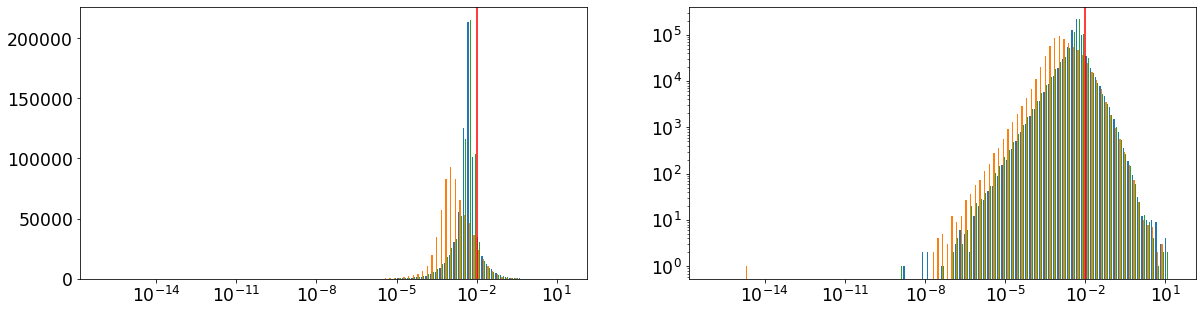

In [15]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(cut, c='r')
axes[1].axvline(cut, c='r')

axes[0].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 1 %

orange is 0th order

In [16]:
df[abs(df['gap-1']/df[f'{A}-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
241525,0.075502,0.263434,-0.187932
560673,0.131213,0.259047,-0.127833
362868,0.032820,0.157709,-0.124889
8598,0.194691,0.296532,-0.101841
94343,0.160148,0.222406,-0.062258
...,...,...,...
503803,0.143552,0.081735,0.061817
297665,0.367187,0.299073,0.068114
371226,0.239978,0.159604,0.080373
340653,0.391709,0.308912,0.082797


In [17]:
df[abs(df['gap0']/df[f'{A}0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
433783,0.409047,0.671978,-0.262931
91477,0.321987,0.559847,-0.237859
126418,0.339299,0.467182,-0.127883
35117,0.447913,0.575617,-0.127704
2262,0.291351,0.410486,-0.119135
...,...,...,...
566538,0.396592,0.225450,0.171142
47133,0.386221,0.185373,0.200848
182526,0.266695,0.056015,0.210680
365886,0.524767,0.247758,0.277008


In [18]:
df[abs(df['gap+1']/df[f'{A}+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
61715,0.127966,0.252517,-0.124551
362868,0.117850,0.223635,-0.105785
337372,0.118047,0.221387,-0.103340
241525,0.279980,0.382212,-0.102233
340653,0.219399,0.317528,-0.098129
...,...,...,...
498808,0.205916,0.151678,0.054237
299633,0.431886,0.367173,0.064713
36752,0.656827,0.585366,0.071461
126418,0.240599,0.163585,0.077014


# benchmark - simulation time

## run time by time.time()

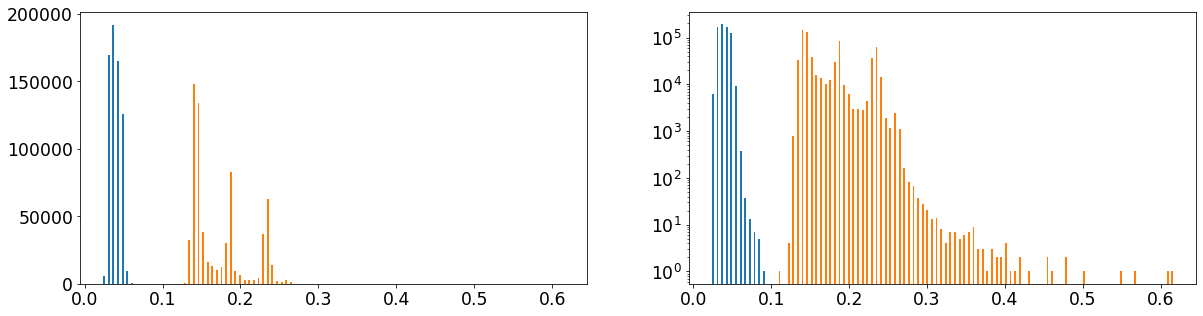

In [19]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f't_{A}'],df[f't_{B}']], bins=100)
axes[1].hist([df[f't_{A}'],df[f't_{B}']], bins=100, log=True)
plt.show()

Blue is  meent with TMM, Oragne is reticolo with octave

## reticolo time / meent time

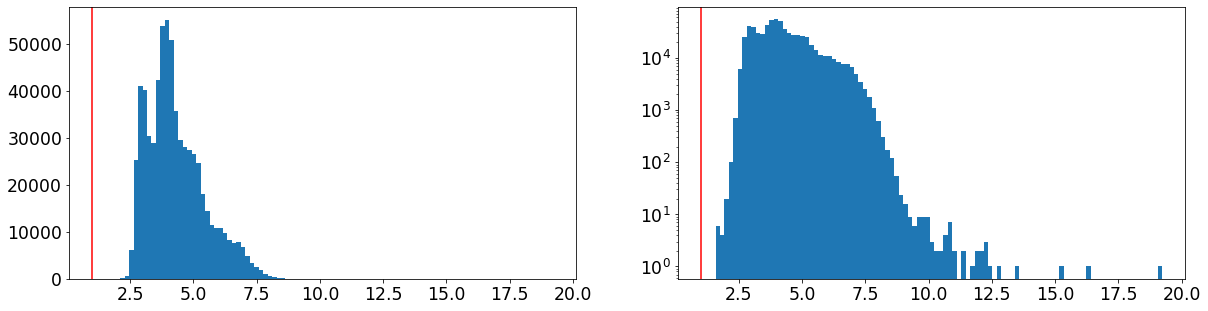

In [20]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [21]:
pd.DataFrame((df[f't_{B}']/df[f't_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,667378.0,4.302717,1.136425,1.575415,3.486391,4.078842,4.96622,19.231572


meent-TMM is faster 4.1 times than reticolo.

right side of red line: TMM is faster

## time.process_time()

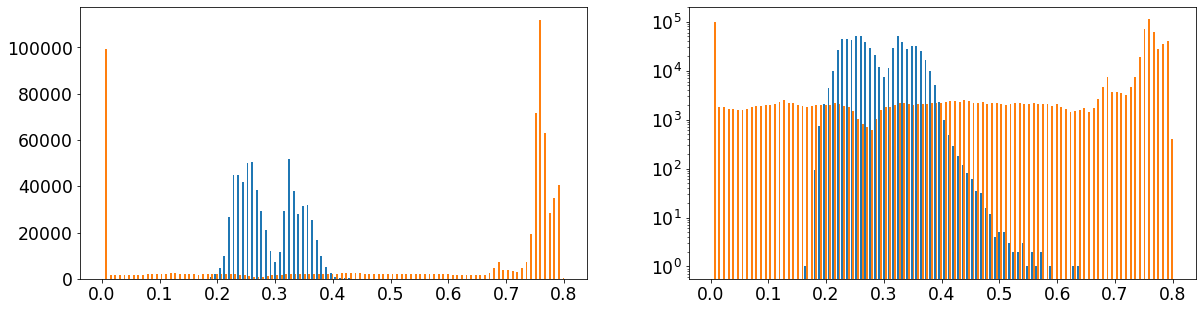

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100)
axes[1].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100, log=True)
plt.show()

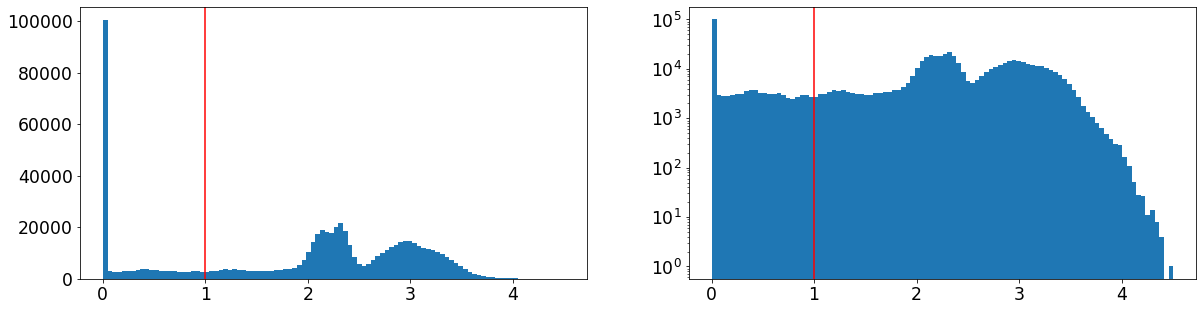

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [24]:
pd.DataFrame((df[f'tpr_{B}']/df[f'tpr_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,667378.0,1.945885,1.137751,0.003806,1.034694,2.23744,2.880849,4.501983


hard to tell...